In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import pprint
import inspect  # <--- ADD THIS LINE
from IPython.display import display, Markdown

# --- 1. PANDAS & IPYTHON OPTIONS ---
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.float_format', '{:.6f}'.format)
%load_ext autoreload
%autoreload 2

# --- 2. PROJECT PATH CONFIGURATION ---
NOTEBOOK_DIR = Path.cwd()
PARENT_DIR = NOTEBOOK_DIR.parent
ROOT_DIR = NOTEBOOK_DIR.parent.parent  # Adjust if your notebook is in a 'notebooks' subdirectory
DATA_DIR = ROOT_DIR / 'data'
SRC_DIR = ROOT_DIR / 'src'

# Add 'src' to the Python path to import custom modules
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

# --- 3. IMPORT CUSTOM MODULES ---
import utils
import plotting_utils

# --- 4. INITIAL_CAPITAL ---
INITIAL_CAPITAL = 100000

# --- 5. RISK FREE ANNUAL RATE ---
RISK_FREE_ANNUAL_RATE = 0.04

# --- 6. VERIFICATION ---
print("--- Path Configuration ---")
print(f"✅ Project Root: {ROOT_DIR}")
print(f"✅ Parent Dir:   {PARENT_DIR}")
print(f"✅ Notebook Dir: {NOTEBOOK_DIR}")
print(f"✅ Data Dir:     {DATA_DIR}")
print(f"✅ Source Dir:   {SRC_DIR}")
assert all([ROOT_DIR.exists(), DATA_DIR.exists(), SRC_DIR.exists()]), "A key directory was not found!"

print("\n--- Module Verification ---")
print(f"✅ Successfully imported 'utils' and 'plotting_utils'.")

--- Path Configuration ---
✅ Project Root: c:\Users\ping\Files_win10\python\py311\stocks
✅ Parent Dir:   c:\Users\ping\Files_win10\python\py311\stocks\notebooks_PyPortfOpt
✅ Notebook Dir: c:\Users\ping\Files_win10\python\py311\stocks\notebooks_PyPortfOpt\_working
✅ Data Dir:     c:\Users\ping\Files_win10\python\py311\stocks\data
✅ Source Dir:   c:\Users\ping\Files_win10\python\py311\stocks\src

--- Module Verification ---
✅ Successfully imported 'utils' and 'plotting_utils'.


In [2]:
df = pd.read_parquet(DATA_DIR / 'df_adj_close.parquet')
print(f'df:\n{df}')

df:
Ticker              A        AA       AAL      AAON       AAPL       ABBV     ABEV        ABT      ACGL        ACM        ACN       ACWI      ACWX       ADBE       ADC        ADI       ADM        ADP       ADSK        AEE      AEG        AEM        AEP        AER       AES        AFG        AFL       AGCO       AGG       AGI     AGNC       AIG      AIRR        AIT        AIZ        AJG      AKAM        AL       ALB       ALGN       ALK        ALL       ALLE      ALLY       ALNY      ALSN        ALV       AMAT     AMCR        AMD        AME       AMGN       AMH      AMLP        AMP        AMT       AMX       AMZN         AN       ANET        AON       AOS       APA        APD        APH        APO      APTV        AR      ARCC       ARE       ARES      ARKK      ARMK        ARW       ASML        ASR       ASX       ATI        ATO        ATR        AU       AVAV        AVB       AVGO        AVY        AWI        AWK       AXON        AXP       AXS      AXTA        AYI       AZN      

In [7]:
print(f'df.info():\n{df.info()}')
print(f'df.index.names:\n{df.index.names}')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2660 entries, 2015-01-02 to 2025-07-31
Columns: 1206 entries, A to ZWS
dtypes: float64(1206)
memory usage: 24.5 MB
df.info():
None
df.index.names:
['Date']


In [9]:
# returns is a DataFrame with the same shape and index as df
returns = df.pct_change()

# Optionally drop the first row (all NaNs) if you don’t need it
returns = returns.dropna()

# Check the result
print(returns.head())

Ticker             A        AA       AAL      AAON      AAPL      ABBV      ABEV       ABT      ACGL       ACM       ACN      ACWI      ACWX      ADBE       ADC       ADI       ADM       ADP      ADSK       AEE       AEG       AEM       AEP       AER       AES       AFG       AFL      AGCO       AGG       AGI      AGNC       AIG      AIRR       AIT       AIZ       AJG      AKAM        AL       ALB     ALGN       ALK       ALL      ALLE      ALLY      ALNY      ALSN       ALV      AMAT      AMCR       AMD       AME      AMGN       AMH      AMLP       AMP       AMT       AMX      AMZN        AN     ANET       AON       AOS       APA       APD       APH       APO      APTV        AR      ARCC       ARE      ARES      ARKK      ARMK       ARW      ASML       ASR       ASX       ATI       ATO       ATR        AU      AVAV      AVB      AVGO       AVY       AWI       AWK      AXON       AXP       AXS      AXTA       AYI       AZN       AZO         B        BA      BABA       BAC       BAH   

In [ ]:
returns = df.pct_change().dropna()

In [51]:
# Initialize an empty list to store the rolling window chunks
rolling_chunks = []

# Loop through the DataFrame with a step of 60 rows
for start in range(0, len(returns) - 300 + 1, 60):
    end = start + 300
    chunk = returns.iloc[start:end]
    rolling_chunks.append(chunk)

# Now rolling_chunks is a list of DataFrames, each containing 300 rows (or fewer for the last chunk)
# Print the number of chunks and the shape of each chunk
for i, chunk in enumerate(rolling_chunks):
    print(f"Chunk {i+1} shape: {chunk.shape}")

Chunk 1 shape: (300, 1206)
Chunk 2 shape: (300, 1206)
Chunk 3 shape: (300, 1206)
Chunk 4 shape: (300, 1206)
Chunk 5 shape: (300, 1206)
Chunk 6 shape: (300, 1206)
Chunk 7 shape: (300, 1206)
Chunk 8 shape: (300, 1206)
Chunk 9 shape: (300, 1206)
Chunk 10 shape: (300, 1206)
Chunk 11 shape: (300, 1206)
Chunk 12 shape: (300, 1206)
Chunk 13 shape: (300, 1206)
Chunk 14 shape: (300, 1206)
Chunk 15 shape: (300, 1206)
Chunk 16 shape: (300, 1206)
Chunk 17 shape: (300, 1206)
Chunk 18 shape: (300, 1206)
Chunk 19 shape: (300, 1206)
Chunk 20 shape: (300, 1206)
Chunk 21 shape: (300, 1206)
Chunk 22 shape: (300, 1206)
Chunk 23 shape: (300, 1206)
Chunk 24 shape: (300, 1206)
Chunk 25 shape: (300, 1206)
Chunk 26 shape: (300, 1206)
Chunk 27 shape: (300, 1206)
Chunk 28 shape: (300, 1206)
Chunk 29 shape: (300, 1206)
Chunk 30 shape: (300, 1206)
Chunk 31 shape: (300, 1206)
Chunk 32 shape: (300, 1206)
Chunk 33 shape: (300, 1206)
Chunk 34 shape: (300, 1206)
Chunk 35 shape: (300, 1206)
Chunk 36 shape: (300, 1206)
C

In [ ]:

returns_300 = returns.iloc[:300]

In [13]:
print(f'returns.shape: {returns.shape}')
print(f'returns_300.shape: {returns_300.shape}')

returns.shape: (2659, 1206)
returns_300.shape: (300, 1206)


In [18]:
returns_train = returns_300.iloc[:240]
returns_test = returns_300.iloc[240:]

In [19]:
print(f'returns_train.shape: {returns_train.shape}')
print(f'returns_test.shape: {returns_test.shape}')

returns_train.shape: (240, 1206)
returns_test.shape: (60, 1206)


In [31]:
import pandas as pd

# Assuming returns_train is your DataFrame with daily returns

# Extract the last 30, 60, 120, and 240 rows
last_30 = returns_train.iloc[-30:]
last_60 = returns_train.iloc[-60:]
last_120 = returns_train.iloc[-120:]
last_240 = returns_train.iloc[-240:]

# Function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    sharpe_ratio = mean_return / std_dev
    return sharpe_ratio

# Calculate Sharpe ratios for each subset
sharpe_ratio_30 = calculate_sharpe_ratio(last_30)
sharpe_ratio_60 = calculate_sharpe_ratio(last_60)
sharpe_ratio_120 = calculate_sharpe_ratio(last_120)
sharpe_ratio_240 = calculate_sharpe_ratio(last_240)

# Print the results
print("Sharpe Ratios for the last 30 rows:")
print(sharpe_ratio_30.head())  # Display the first few tickers for brevity

print("Sharpe Ratios for the last 60 rows:")
print(sharpe_ratio_60.head())  # Display the first few tickers for brevity

print("\nSharpe Ratios for the last 120 rows:")
print(sharpe_ratio_120.head())  # Display the first few tickers for brevity

print("\nSharpe Ratios for the last 240 rows:")
print(sharpe_ratio_240.head())  # Display the first few tickers for brevity

Sharpe Ratios for the last 30 rows:
Ticker
A       0.132345
AA      0.012132
AAL    -0.139282
AAON    0.124330
AAPL   -0.187848
dtype: float64
Sharpe Ratios for the last 60 rows:
Ticker
A       0.162480
AA     -0.026626
AAL     0.001403
AAON    0.123564
AAPL   -0.032033
dtype: float64

Sharpe Ratios for the last 120 rows:
Ticker
A       0.020552
AA     -0.052821
AAL     0.016062
AAON    0.019775
AAPL   -0.049970
dtype: float64

Sharpe Ratios for the last 240 rows:
Ticker
A       0.011198
AA     -0.081790
AAL    -0.027923
AAON    0.025558
AAPL    0.015189
dtype: float64


In [32]:
# Extract the Sharpe ratio of 'VGT' for each period
vgt_sharpe_30 = sharpe_ratio_30['VGT']
vgt_sharpe_60 = sharpe_ratio_60['VGT']
vgt_sharpe_120 = sharpe_ratio_120['VGT']
vgt_sharpe_240 = sharpe_ratio_240['VGT']

# Find tickers with higher Sharpe ratio than 'VGT' for all four periods
tickers_with_higher_sharpe = sharpe_ratio_30[
    (sharpe_ratio_30 > vgt_sharpe_30) &    
    (sharpe_ratio_60 > vgt_sharpe_60) &
    (sharpe_ratio_120 > vgt_sharpe_120) &
    (sharpe_ratio_240 > vgt_sharpe_240)
].index

# Print the tickers
print("Tickers with higher Sharpe ratio than 'VGT' for all four periods:")
print(tickers_with_higher_sharpe)

Tickers with higher Sharpe ratio than 'VGT' for all four periods:
Index(['ACN', 'ADBE', 'ADC', 'ALGN', 'ALV', 'AMZN', 'AOS', 'ATO', 'AWK', 'AYI',
       ...
       'VRSN', 'W', 'WAL', 'WAT', 'WCN', 'WM', 'WST', 'WTRG', 'XLK', 'XLP'], dtype='object', name='Ticker', length=113)


In [37]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, to_tree
from scipy.spatial.distance import pdist

# Filter returns_train to only include tickers in tickers_with_higher_sharpe
returns_train_filtered = returns_train[tickers_with_higher_sharpe]

# Calculate the covariance matrix
cov_matrix = returns_train_filtered.cov()

# Calculate the distance matrix
dist_matrix = pdist(cov_matrix, metric='correlation')

# Perform hierarchical clustering
linkage_matrix = linkage(dist_matrix, method='single')

# Convert the linkage matrix to a tree structure
tree = to_tree(linkage_matrix)

# Function to get the order of leaves in the dendrogram
def get_leaf_order(tree):
    if tree.is_leaf():
        return [tree.id]
    return get_leaf_order(tree.left) + get_leaf_order(tree.right)

# Get the order of leaves
leaf_order = get_leaf_order(tree)

# Function to allocate risk proportionally
def allocate_risk(cov_matrix, leaf_order):
    n = len(cov_matrix)
    weights = np.zeros(n)
    cluster_var = np.diag(cov_matrix)
    total_var = np.sum(cluster_var)
    for i, ticker in enumerate(leaf_order):
        weights[ticker] = cluster_var[i] / total_var
    return weights

# Allocate risk proportionally
weights = allocate_risk(cov_matrix, leaf_order)

# Select the top 10 tickers with the highest weights
selected_tickers = returns_train_filtered.columns[np.argsort(weights)[-10:][::-1]]

# Get the weights for the selected tickers
selected_weights = weights[np.argsort(weights)[-10:][::-1]]

# Normalize the selected weights to ensure they sum to 1
selected_weights /= np.sum(selected_weights)

# Print the selected tickers and their normalized weights
print("Selected tickers for the diversified portfolio using HRP:")
print(selected_tickers)
print("Normalized portfolio weights for the selected tickers:")
print(selected_weights)

# Verify that the weights sum to 1
print("Sum of weights:", np.sum(selected_weights))

Selected tickers for the diversified portfolio using HRP:
Index(['CINF', 'HSIC', 'ATO', 'MSCI', 'GWRE', 'MKL', 'FRT', 'WTRG', 'EQR', 'CLX'], dtype='object', name='Ticker')
Normalized portfolio weights for the selected tickers:
[0.17105068 0.13246848 0.10900294 0.10731517 0.08990794 0.08784335
 0.08289131 0.08142547 0.07376807 0.06432658]
Sum of weights: 1.0000000000000002


In [36]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, to_tree
from scipy.spatial.distance import pdist

# Filter returns_train to only include tickers in tickers_with_higher_sharpe
returns_train_filtered = returns_train[tickers_with_higher_sharpe]

# Calculate the covariance matrix
cov_matrix = returns_train_filtered.cov()

# Calculate the distance matrix
dist_matrix = pdist(cov_matrix, metric='correlation')

# Perform hierarchical clustering
linkage_matrix = linkage(dist_matrix, method='single')

# Convert the linkage matrix to a tree structure
tree = to_tree(linkage_matrix)

# Function to get the order of leaves in the dendrogram
def get_leaf_order(tree):
    if tree.is_leaf():
        return [tree.id]
    return get_leaf_order(tree.left) + get_leaf_order(tree.right)

# Get the order of leaves
leaf_order = get_leaf_order(tree)

# Function to allocate risk proportionally
def allocate_risk(cov_matrix, leaf_order):
    n = len(cov_matrix)
    weights = np.zeros(n)
    cluster_var = np.diag(cov_matrix)
    total_var = np.sum(cluster_var)
    for i, ticker in enumerate(leaf_order):
        weights[ticker] = cluster_var[i] / total_var
    return weights

# Allocate risk proportionally
weights = allocate_risk(cov_matrix, leaf_order)

# Normalize the weights to ensure they sum to 1
weights /= np.sum(weights)

# Select the top 10 tickers with the highest weights
selected_tickers = returns_train_filtered.columns[np.argsort(weights)[-10:][::-1]]

# Get the weights for the selected tickers
selected_weights = weights[np.argsort(weights)[-10:][::-1]]

# Print the selected tickers and their weights
print("Selected tickers for the diversified portfolio using HRP:")
print(selected_tickers)
print("Portfolio weights for the selected tickers:")
print(selected_weights)

# Verify that the weights sum to 1
print("Sum of weights:", np.sum(selected_weights))

Selected tickers for the diversified portfolio using HRP:
Index(['CINF', 'HSIC', 'ATO', 'MSCI', 'GWRE', 'MKL', 'FRT', 'WTRG', 'EQR', 'CLX'], dtype='object', name='Ticker')
Portfolio weights for the selected tickers:
[0.05391371 0.04175293 0.03435679 0.03382483 0.02833822 0.02768747
 0.02612663 0.02566461 0.02325107 0.02027519]
Sum of weights: 0.31519145527093


Daily values of the portfolio and 'VGT':
            Portfolio_Cumulative  VGT_Cumulative
Date                                            
2015-12-16              1.014242        1.013345
2015-12-17              1.007540        0.997899
2015-12-18              0.995954        0.978162
2015-12-21              0.996189        0.987755
2015-12-22              1.001589        0.994244
2015-12-23              1.010781        1.002984
2015-12-24              1.013083        1.002525
2015-12-28              1.021352        1.002341
2015-12-29              1.029079        1.014813
2015-12-30              1.024089        1.007022
2015-12-31              1.011300        0.993171
2016-01-04              0.991893        0.977763
2016-01-05              0.999412        0.973085
2016-01-06              0.992881        0.959878
2016-01-07              0.977270        0.928971
2016-01-08              0.971114        0.920991
2016-01-11              0.971836        0.925486
2016-01-12              0.97

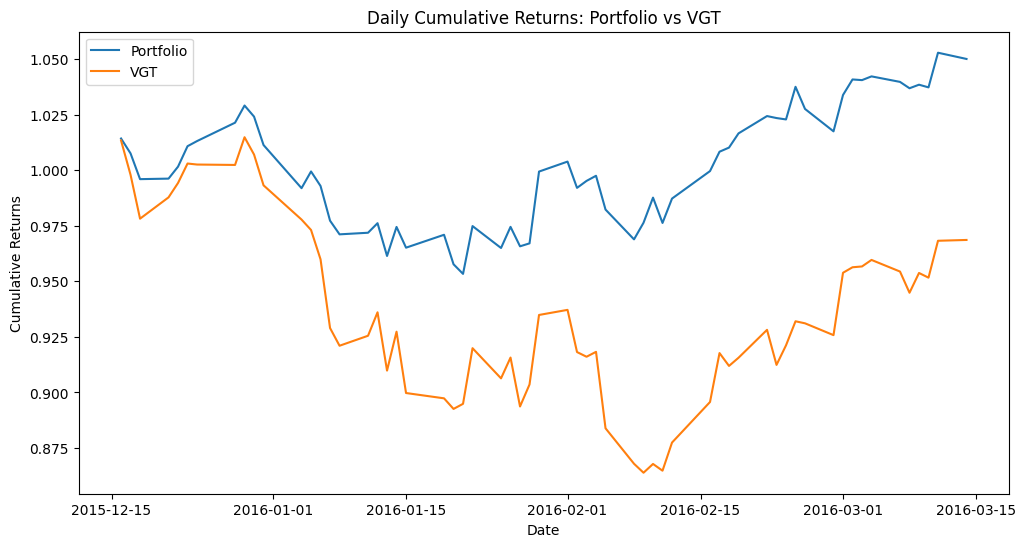

In [38]:
import numpy as np
import pandas as pd

# Ensure returns_test is a DataFrame with daily returns for all tickers
# returns_test should have a DatetimeIndex and columns for each ticker

# Extract the daily returns for the selected tickers
selected_returns = returns_test[selected_tickers]

# Extract the daily returns for 'VGT'
vgt_returns = returns_test['VGT']

# Calculate the daily portfolio value
portfolio_value = selected_returns.dot(selected_weights)

# Create a DataFrame to store the daily values
daily_values = pd.DataFrame({
    'Portfolio': portfolio_value,
    'VGT': vgt_returns
})

# Calculate the cumulative returns for the portfolio and 'VGT'
daily_values['Portfolio_Cumulative'] = (1 + daily_values['Portfolio']).cumprod()
daily_values['VGT_Cumulative'] = (1 + daily_values['VGT']).cumprod()

# Print the daily values
print("Daily values of the portfolio and 'VGT':")
print(daily_values[['Portfolio_Cumulative', 'VGT_Cumulative']])

# Plot the cumulative returns for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_values.index, daily_values['Portfolio_Cumulative'], label='Portfolio')
plt.plot(daily_values.index, daily_values['VGT_Cumulative'], label='VGT')
plt.title('Daily Cumulative Returns: Portfolio vs VGT')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [ ]:
# print(f'selected_returns:\n{selected_returns}')
# print(f'\nselected_weights:\n{selected_weights}')
# print(f'\nportfolio_value:\{portfolio_value}')  
# print(f'\nvgt_returns:\n{vgt_returns}')
# print(f'daily_values:\n{daily_values}') 

#######################################  
#######################################  
#######################################  

In [45]:
file_list = utils.get_recent_files(
    directory_path = DATA_DIR,
    extension = 'parquet', 
    prefix = None,
    contains_pattern = 'df_finviz_merged_stocks_etfs',
    count = None
)

print(f'file_list:\n{file_list}')

file_list:
['2025-07-31_df_finviz_merged_stocks_etfs.parquet', '2025-07-30_df_finviz_merged_stocks_etfs.parquet', '2025-07-29_df_finviz_merged_stocks_etfs.parquet', '2025-07-28_df_finviz_merged_stocks_etfs.parquet', '2025-07-25_df_finviz_merged_stocks_etfs.parquet', '2025-07-24_df_finviz_merged_stocks_etfs.parquet', '2025-07-23_df_finviz_merged_stocks_etfs.parquet', '2025-07-22_df_finviz_merged_stocks_etfs.parquet', '2025-07-21_df_finviz_merged_stocks_etfs.parquet', '2025-07-18_df_finviz_merged_stocks_etfs.parquet', '2025-07-17_df_finviz_merged_stocks_etfs.parquet', '2025-07-16_df_finviz_merged_stocks_etfs.parquet', '2025-07-15_df_finviz_merged_stocks_etfs.parquet', '2025-07-14_df_finviz_merged_stocks_etfs.parquet', '2025-07-11_df_finviz_merged_stocks_etfs.parquet', '2025-07-10_df_finviz_merged_stocks_etfs.parquet', '2025-07-09_df_finviz_merged_stocks_etfs.parquet', '2025-07-08_df_finviz_merged_stocks_etfs.parquet', '2025-07-07_df_finviz_merged_stocks_etfs.parquet', '2025-07-03_df_finv

In [46]:
df_finviz = pd.read_parquet(DATA_DIR / file_list[0])
print(f'df_finviz:\n{df_finviz}')

df_finviz:
      No.                                          Company               Index                  Sector                        Industry Country Exchange                                               Info  MktCap AUM, M  Rank  Market Cap, M       P/E   Fwd P/E      PEG       P/S       P/B       P/C      P/FCF   Book/sh   Cash/sh  Dividend %  Dividend TTM Dividend Ex Date  Payout Ratio %       EPS  EPS next Q  EPS this Y %  EPS next Y %  EPS past 5Y %  EPS next 5Y %  Sales past 5Y %  Sales Q/Q %  EPS Q/Q %  EPS YoY TTM %  Sales YoY TTM %      Sales, M     Income, M  EPS Surprise %  Revenue Surprise %  Outstanding, M     Float, M   Float %  Insider Own %  Insider Trans %  Inst Own %  Inst Trans %  Short Float %  Short Ratio  Short Interest, M     ROA %      ROE %    ROIC %   Curr R  Quick R  LTDebt/Eq  Debt/Eq  Gross M %  Oper M %  Profit M %  Perf 3D %  Perf Week %  Perf Month %  Perf Quart %  Perf Half %  Perf Year %  Perf YTD %     Beta      ATR  ATR/Price %  Volatility W %  

In [ ]:
import pandas as pd

# Define the columns you want to include in the new DataFrame
cols = [
    'Company',
    'Index',
    'Sector',
    'Industry',
    'Info',
]

# Filter the DataFrame to include only the selected tickers
df_selected = df_finviz.loc[selected_tickers]

# Select the specified columns
df_selected = df_selected[cols]

# Print the resulting DataFrame
print("DataFrame with selected tickers and specified columns:")
print(df_selected)

DataFrame with selected tickers and specified columns:
                                    Company    Index              Sector                          Industry                                               Info
Ticker                                                                                                                                                       
CINF              Cincinnati Financial Corp  S&P 500           Financial   Insurance - Property & Casualty         Financial, Insurance - Property & Casualty
HSIC                       Henry Schein Inc  S&P 500          Healthcare              Medical Distribution                   Healthcare, Medical Distribution
ATO                       Atmos Energy Corp  S&P 500           Utilities         Utilities - Regulated Gas               Utilities, Utilities - Regulated Gas
MSCI                               MSCI Inc  S&P 500           Financial  Financial Data & Stock Exchanges        Financial, Financial Data & Stock Exchang